# Machine Learning Engineer Nanodegree
## Captone Project
## Predicting Hospitalization Time Using The Body Mass Index

Doctors in the health industry consider obesity a risk factor for multiple types of illness.
Conditions like diabetes type 2, hypertension and cardiovascular diseases and various types of tumors, in overweight patients [1] are associated with higher rates of mortality. It seems clear that obesity has a negative impact on humans.

In the medical field, there is a hypothesis know as The obesity paradox [2]. The obesity
paradox hypothesis state that overweight elderly patients have a better chance to survive
illness like the ones describes in the previous paragraph than underweight patients.
Multiples studies try to proof or invalidate such hypothesis [3, 4, 8]. Some of the studies have found evidence that there is indeed some time of protection granted by a high BMI (body mass index) and others argue that confounding variables and lack of follow up invalidate such proofs [5]. One thing is sure, that despite which study is the correct all of them prove one way or another that there is a correlation between the: BMI, the age, the medical condition and the smoking habits; and that this association influence negative or positive the resilient capacity of a human being.

My proposal is based on the background knowledge of the correlation of the features
described in the previous paragraph; it should be possible to train a learner to predict how much time a patient will stay hospitalized (including ICU time) due to surgery, based in the afford mentioned features.

The main reason why I decided to work on this problem is that I am a firm believer that the medical field can benefit so much using technology that the sky is the limit. Patient diagnostic tools have improved way faster than the diagnostic method itself, so much is still to do in this field.

## Proposed Solution
As was described at the beginning of this notebook, obesity is considered a health factor risk in some cases and a protection feature for some others. Previous medical studies are proof one versus the other with no clear conclusion. My study proposes not agreed with any of the two positions but to use the existing information to measure how resilient the body is to surgery using the features of those previous studies. The metric is the time a patient spent hospitalized. 
My solution to the described problem, consists in determine the relation of the medical conditions, age, hospitalization time and the "Body Mass Index." If such correlation is strong enough, it may be possible to train a computer model to predict the time a patient will spend hospitalized based on these features. Note that I do not intend to perform another study to proof or disproof the paradox, but to create a tool that can be used in future experiments to predict the hospitalization days and compare the prediction with the reality. 
My model has to predict a value that of the type continue, so the choice of algorithm will be a regression.

## Strategy

The proposed strategy to accomplish the solution is to get from the raw dataset, a set of features related to the one discuss in the studies, documented in this project proposal. Once this subset is selected, we need to compare and understand the relation between such features and the hospitalization time. Some of the features are continues which facility the identification of such connection by using statistical methods (ex. correlation). Other features like the medical condition and the gender are categorical data, in this case, the complexity of understanding their relation to the hospitalization time increases, this is where machine learning algorithms like "Decision Tree" can be used to find connections I can not discover using other methods.
The use of the above strategy and some data preparation techniques like encoding,  outliers identification, balancing and data cluster identification will be utilized during this project to prepare the data as much as possible for the prediction model ingestion.

## Dataset

To train and test our predictor we will use some of the features of the MIMIC-III (MIT Lab for Computational Physiology) dataset. The MIMIC-III dataset contains more than 40,000 critical patients records. Information and details related to it can be found on the website https://mimic.physionet.org; this is not an open source dataset so access to it must be requested. I selected the sample of the dataset by answering the following questions:

    Did the patient survive, yes or no?
    Does the patient has pre-existing conditions, other than the one selected in the obesity paradox studies?
    Does the patient has both metrics recorded, height and weight.
    The MIMICIII database contains information on each visit of the patient to the hospital, for the purpose of this project we only selected the first visit information.

The resultant dataset has 6862 patients. The data set was exported to a CSV file so it can be loaded into a pandas data frame.

!!!! NOTE: Once the data set was in the CSV format I noticed that there were patients with age set to 300. Further reading of the MIMICIII database description shown that patients that were 89 years old or greater have their age set to 300. While the dataset was in the CSV format, we replaced all the Ages with 300 in its value by the number 89.
### FEATURES SELECTED

Body Mass Index: CHARTEVENTS table Sub-Set of Medical Conditions: DIAGNOSESICD table Age: PATIENT table Sex: PATIENT table
### LABEL

Admission Time Discharge Time (MIMIC admissions table): ADMISSION table 2 NOTE: The ”Body Mass Index” needs to be calculated from the height and weight values of the patients' data. The formula we will use is:

BMI = WeightKg/(Heightmtrs) 2

The features were selected based on the medical studies related to the Obesity Paradox.’ The selected label is "continue" as most of the features values. The only feature that requires encoding is the Sex and Icd9 codes.

I will perform the following steps to prepare the data set for exploration:

1. load the dataset into a panda data frame.
2. Encode the SEX and PAtient_Diagnoctic_Icd9 features. The icd9 codes look like continues data, but in reality, they are classes of the medical conditions observed in the obesity paradox studies.
3. We will drop the Hospital_Stay_Days from our dataset and stored in a separate variable. Hospital_Stay_Days is the variables we want to predict.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn import preprocessing
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder

# Load the Obesity Paradox Dataset
data = pd.read_csv('obesity-paradox-dataset.csv')

# Labels outcome separation
day_in_hospital = data['Hospital_Stay_Days']
data = data.drop('Hospital_Stay_Days', axis = 1)



# Drop the patient ID
data = data.drop('Patient_ID', axis = 1)
features = data.copy()

# Data set first 5 rows preview before encoding
display(data.head())

# Patient_Gender encoder
patient_gender_encoded = pd.get_dummies(data['Patient_Gender'])
data = (pd.concat([data,patient_gender_encoded], axis = 1)).drop('Patient_Gender', axis = 1)

# Patient medical coditions encoding.
patient_diagnostic_code = data['Patient_Diagnostic_Icd9']
data = data.rename(columns = {'Patient_Diagnostic_Icd9':'Icd9_Code'})

# Icd9 to lables
# icd9Codes module contains a list of the deseases that will study and
# a function that converts the icd9 codes to its names.
import icd9Codes
patient_diagnostic_code
# Merge patient_diagnostic_code back and drop patient_diagnostic_icd9 column
data = (pd.concat([data,patient_diagnostic_code.apply(icd9Codes.assign_label)], axis = 1)).drop('Icd9_Code', axis = 1)

# I have to get rid of the NaN ICD9 codes which does not belogns to the list
# of medical conditions we are studing. Before doing that I have to merge the label back to data
# to keep records consistency.
data = pd.concat([data,day_in_hospital], axis = 1)
data = data.dropna().reset_index(drop = True)


day_in_hospital = data['Hospital_Stay_Days']
data = data.drop('Hospital_Stay_Days', axis = 1)

# Finally we encode the Patient_Diagnosctic_Icd9 column
patient_diagnostic_encoded = pd.get_dummies(data['Patient_Diagnostic_Icd9'])
data = (pd.concat([data,patient_diagnostic_encoded], axis = 1)).drop('Patient_Diagnostic_Icd9', axis = 1)

display(data.head())




,Patient_Gender,Patient_Diagnostic_Icd9,Patient_Age,BIM
0,M,4019,71,29.0
1,M,27401,71,29.0
2,M,42731,71,29.0
3,M,4019,68,30.0
4,M,2724,68,30.0


,Patient_Age,BIM,F,M,cardiovascular_disorders,diabetes,hypertension,lipid_disorders,neoplasia
0,71,29.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,71,29.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,68,30.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,68,30.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,68,30.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Data Exploration
After applying most of the transformation, I will explore the data by calculating its minimum, maximum, mean, median, and standard deviation. I will also explore the correlation between the BMI and the hospitalization time.

I will perform the following steps.
- Calculate statistics metrics
- Plot the correlation between the continues features and the label.
- Present the conclusion of my observations.

Statistics for Obesity Paradox dataset:

Minimum time in days: 0.00
Maximum time in days: 88.00
Mean time: 8.16
Median time 6.00
Standard deviation of time: 6.91


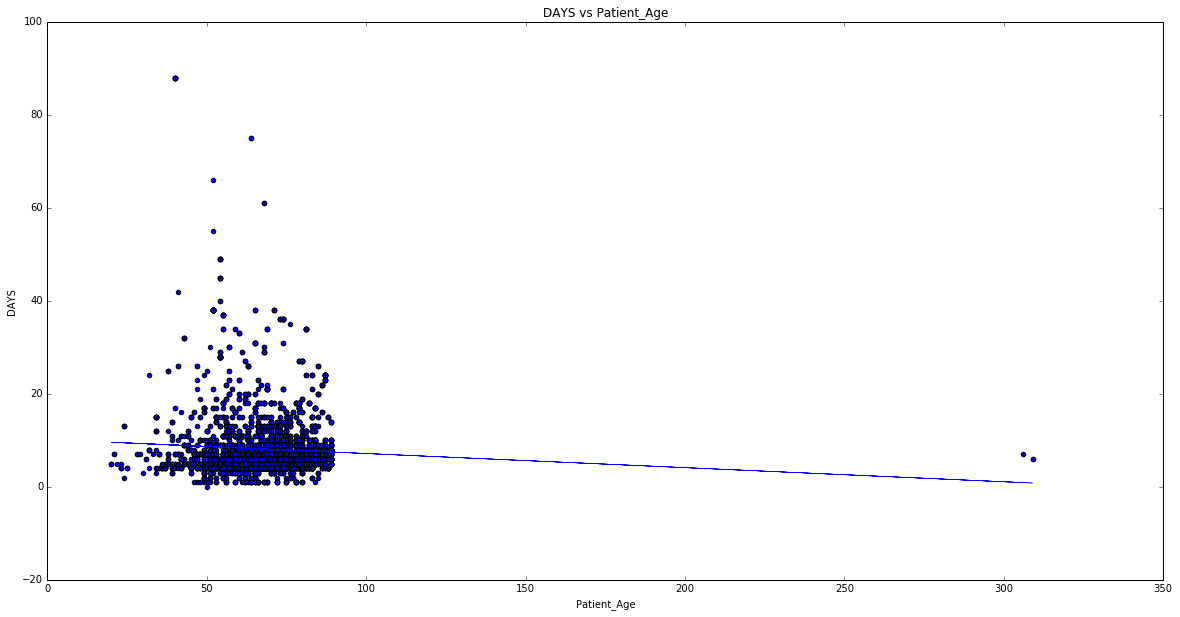

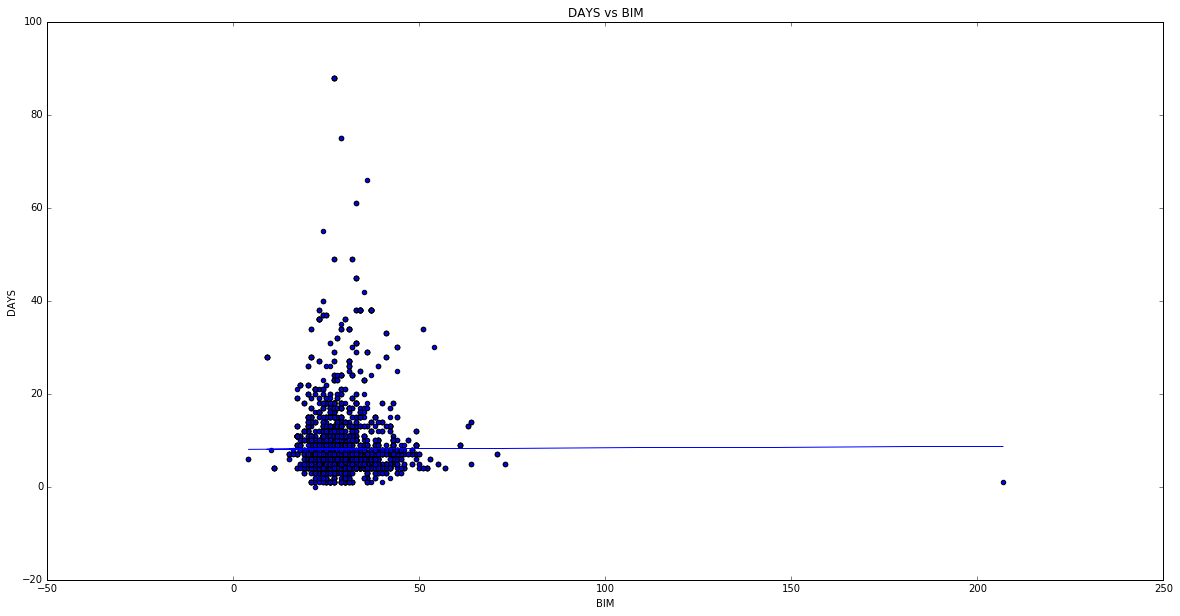

In [2]:
# Minimum hospitalization time
minimum_days = np.amin(day_in_hospital)

# Maximum hospitalization_time
maximum_days = np.amax(day_in_hospital)

# Mean hospitalization time
mean_days = np.mean(day_in_hospital)

# Median hospitalization time
median_days = np.median(day_in_hospital)

# Standard deviation of hospitalization time
std_days = np.std(day_in_hospital)

# Show the calculated statistics
print "Statistics for Obesity Paradox dataset:\n"
print "Minimum time in days: {:.2f}".format(minimum_days)
print "Maximum time in days: {:.2f}".format(maximum_days)
print "Mean time: {:.2f}".format(mean_days)
print "Median time {:.2f}".format(median_days)
print "Standard deviation of time: {:.2f}".format(std_days)

# Plot the correlations
import matplotlib.pyplot as plt
%matplotlib inline


# Drop categorical features
features = data.drop(['F','M','cardiovascular_disorders','diabetes','hypertension','lipid_disorders','neoplasia'], axis = 1)


# See the correlation between the remaining features
for col in features:
    fig,ax = plt.subplots(figsize=(20,10))
    fit = np.polyfit(features[col], day_in_hospital, deg=1)
    ax.scatter(features[col], day_in_hospital)
    plt.plot(features[col], day_in_hospital, 'o', markersize=0.1, color='black')
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=0.5)
    plt.title('DAYS vs '+ str(col))
    plt.xlabel(col)
    plt.ylabel('DAYS')
    




### Feature Observation conclusions
As a reminder, we are using four features: `'Patient_Age'`,`'Patient_Gender'`, `'BMI'` and `'Medical_Condition'`. For each data point (hospital first visit):
- `'Patient_Age'` Is the patient age in years at the moment of its first admission.
- `'Patient_Gender'` Is the patient gender.
- `'BMI'` BMI is an estimate of body fat and a good measure of your patients' risk for diseases that can occur with overweight and obesity. For adults, a healthy weight is defined as the appropriate body weight in relation to height. This ratio of weight to height is known as the body mass index (BMI). People who are overweight (BMI of 25–29.9) have too much body weight for their height. People who are obese (BMI of 30 or above) almost always have a large amount of body fat in relation to their height (https://www.nhlbi.nih.gov/health/educational/lose_wt/bmitools.htm).
- `'Medical Condition'` The medical conditions diagnosed at the moment of the first admission.

From the data exploration exercise below, I can determine the following.
- The dataset label, "days_in_hospital" this means that most of its values are very close to each other. Most of the stays days are contained in one standard deviation (2 to 14 days). There are some data points further from the cluster, but they are not too many; this could be an indication of BIAS produce by the fact that I selected only the first visit to the hospital. In average, a person stays eight days in the hospital the first visit no matter the condition or the BMI. The predictor, if performs well should produce values between two and fourteen days (one standard deviation).
- A negative correlation exists between the age and the hospital staying; this makes sense because the older a person is, the slower is the recovery.
- It doesn't seem to be a high degree correlation between the BMI and the hospital stay; that said you can see that BMIs between 0 and 50 stays between 0 a 20 days. As per the BMI index description, most of the data points accounts for people that are overweight or obese. 
- I also see outliers; these will be removed further than this analysis.

## Performance Metric Function

To measure our model’s accuracy, we will use the R2 or the coefficient of determination. This metric tells us how much our prediction is explained by the vector features. The highest good value for R2 is 1.0, and the worst can be negative. A model that predicts correctly not matter what features are input will always give an R2 of 0; this is a clear indication of an overfitted model. The Mathematically operation to calculate R2 is as follow: the square difference between the real label value and the predicted value,’ divided by the square variance of the original label’s distribution minus 1. I am dividing the actual error of my prediction between the spread of the values of the fitted data distribution, in and an ideal scenario where the prediction is close to the real value the different between one and the division is close to 1. R2 metric help to tune the model parameters so this error gets lower, and the R2 gets higher. The mathematical representation of the R2 is:

R (y, yˆ) = 1 − Σ(yi, yi) /Σ(yi, y ̄)

I will perform the following steps:

- Create a fuction that will be used as score function.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

## Cleaning The Data
After applying the changes to explore our data we still have approximately 5000 records.  My next step is to get rid of the outliers. During the data exploration, we plotted the data points. Is clear that are outliers that need to be removed. I will use the quartile strategy to get rid of the outliers.

I will perform the following steps.

- Detect outliers and get read of them using the quartiles of the data set and getting rid of the 1st and 3rd quartile.


In [4]:
# We first join the label back to features and reset the index.
data_with_outliers = pd.concat([day_in_hospital,data], axis = 1)
data_with_outliers.reset_index(drop = True)

# We drop the discrete features.
data_with_outliers = data_with_outliers.drop(data_with_outliers.columns[3:10], axis = 1)


# Let us detect the outliers
index_list = []
for col in data_with_outliers.keys():
    # Calculate 1st Quartile
    Q1 = np.percentile(data_with_outliers[col],25)
    print "The {} Q1 is: {}".format(col,Q1)
    # Calculate 3rd Quartile
    Q3 = np.percentile(data_with_outliers[col],75)
    print "The {} Q3 is: {}".format(col,Q3)
    # Any index that is greater than or lesser than 1.5 times the difference between the value of the Q3 minus
    # Q1 range is considered an outlier.
    step = 1.5*(Q3 - Q1)
    print "Data points considered outliers for the feature '{}':".format(col)
    display(data_with_outliers[~((data_with_outliers[col] >= Q1 - step) & (data_with_outliers[col] <= Q3 + step))])
    # Capture outliers index in a list
    index_list.append(data_with_outliers[~((data_with_outliers[col] >= Q1 - step) & (data_with_outliers[col] <= Q3 + step))].index.tolist())

# Let us see which records contains more than one outlier.
outliers  = [y for x in index_list for y in x]
repeated_outliers=[]
from collections import Counter
cnt = Counter(outliers)
for el in cnt.elements():
    if cnt[el] > 1:
        repeated_outliers.append(el)
print "Following records are outliers for more than one feature:", list(set(repeated_outliers))
display(data_with_outliers.loc[repeated_outliers])


# Let us remove the outliers
# First let us add the categorical columns
temp_data = data.drop(data.columns[0:2], axis = 1)
data_with_outliers = pd.concat([data_with_outliers,temp_data], axis = 1)
good_data = data_with_outliers.drop(data_with_outliers.index[repeated_outliers]).reset_index(drop = True)


# RESULT GOOD_DATA
print good_data.head()

The Hospital_Stay_Days Q1 is: 5.0
The Hospital_Stay_Days Q3 is: 9.0
Data points considered outliers for the feature 'Hospital_Stay_Days':


,Hospital_Stay_Days,Patient_Age,BIM
21,18,78,27.0
22,18,78,27.0
23,18,78,27.0
24,18,78,27.0
25,18,78,27.0
26,18,78,27.0
27,18,78,27.0
28,17,40,34.0
81,16,49,27.0
82,16,49,27.0


The Patient_Age Q1 is: 60.0
The Patient_Age Q3 is: 76.0
Data points considered outliers for the feature 'Patient_Age':


,Hospital_Stay_Days,Patient_Age,BIM
31,7,33,35.0
66,7,35,23.0
67,7,35,23.0
68,7,35,23.0
866,4,23,25.0
867,4,23,25.0
868,4,23,25.0
1242,7,306,20.0
1277,2,24,24.0
1376,4,25,33.0


The BIM Q1 is: 25.0
The BIM Q3 is: 32.0
Data points considered outliers for the feature 'BIM':


,Hospital_Stay_Days,Patient_Age,BIM
7,3,49,44.0
8,7,65,49.0
9,7,65,49.0
10,7,65,49.0
11,7,65,49.0
117,7,57,44.0
118,7,57,44.0
119,7,57,44.0
120,7,57,44.0
121,7,57,44.0


Following records are outliers for more than one feature: [2816, 2817, 2818, 2062, 1575, 1203, 4288, 4289, 4290, 3784, 3785, 3786, 987, 988, 4459, 4461, 4463, 4465, 4467, 4469, 4474, 2815]


,Hospital_Stay_Days,Patient_Age,BIM
2062,30,51,54.0
2062,30,51,54.0
4463,28,54,9.0
4463,28,54,9.0
4465,28,54,9.0
4465,28,54,9.0
4288,18,71,43.0
4288,18,71,43.0
4289,18,71,43.0
4289,18,71,43.0


   Hospital_Stay_Days  Patient_Age   BIM    F    M  cardiovascular_disorders  \
0                   6           71  29.0  0.0  1.0                       0.0   
1                   6           71  29.0  0.0  1.0                       1.0   
2                   4           68  30.0  0.0  1.0                       0.0   
3                   4           68  30.0  0.0  1.0                       0.0   
4                   4           68  30.0  0.0  1.0                       0.0   

   diabetes  hypertension  lipid_disorders  neoplasia  
0       0.0           1.0              0.0        0.0  
1       0.0           0.0              0.0        0.0  
2       0.0           1.0              0.0        0.0  
3       0.0           0.0              1.0        0.0  
4       1.0           0.0              0.0        0.0  


## Selecting the Training Sample
Now that my dataset is clean, it is time to sample the data that I will use to train the model. I can just select an even number of records making sure that the dataset contains:
- An even number of Male and Females.
- An even number of each type of medical conditions.

Sample my data this way won't be enough, so I will go even further to use a soft clustering model to identify groups using the hospitalization time, age and BMI.
I will use a Gaussian Mixture soft cluster instead of a hard cluster, the data variance is small, so my data points are too close to each other to create clear boundaries.
I will use the cluster's silhouette as a metric to determine the number of clusters.

I will perform the following steps:

- Sample some data of the data set.
- Make sure the samples don't be similar but ranking them using the dataset percentile.
- Scale and review the data correlation and distribution.
- Reduce the continues data to two dimensions to see if our samples below to multiple classes.
- Conclusions.

Selected Samples


,Hospital_Stay_Days,Patient_Age,BIM
0,5,78,28.0
1,10,63,31.0
2,5,48,27.0
3,7,74,33.0
4,5,56,27.0


Sample percentile ranking


,Hospital_Stay_Days,Patient_Age,BIM
1650,32.5,79.0,51.2
166,79.8,34.1,71.8
3134,32.5,5.3,42.9
2489,59.5,68.9,79.8
2650,32.5,16.4,42.9


Number of element cluster 0: 4007 Number of Elements Cluster 1: 1318
[[-0.14512061  0.01090803]
 [ 0.26058315 -0.0195868 ]]


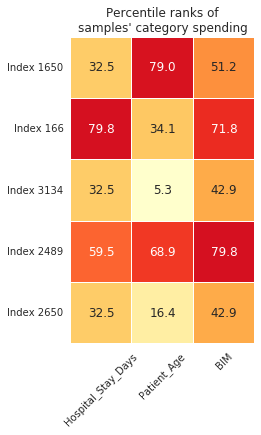

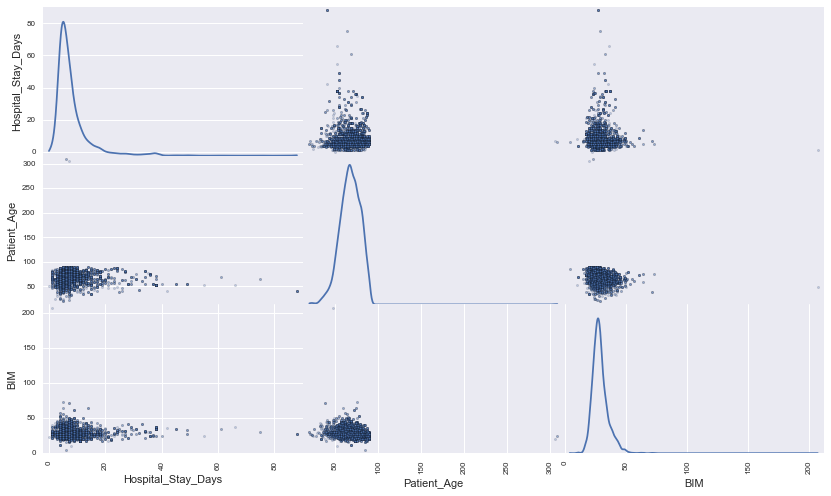

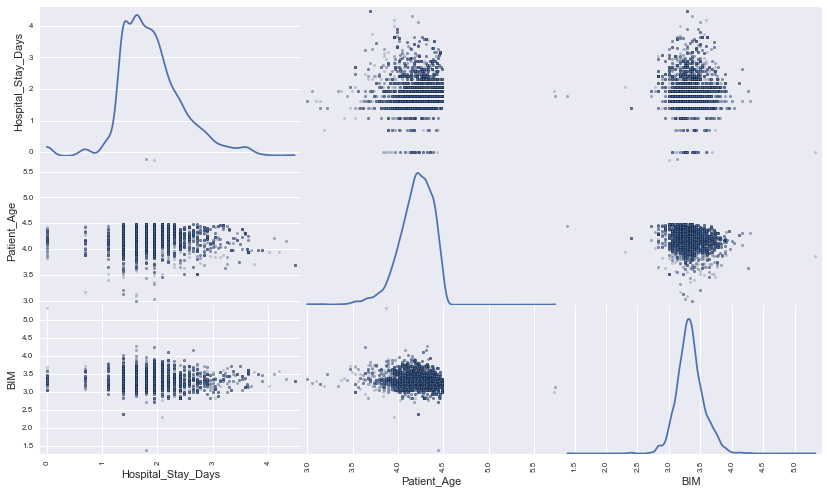

In [5]:
# Get data and drop the discret outputs to calculate the percentil ranks. This wiil allow me to
# see the similarity between the sample data points I selected in the previous section.
# I will choose five samples around the middle of the dataset
indices = [1650,166,3134,2489,2650 ]
# I will create a dataframe with these samples.
samples = (pd.DataFrame(good_data.loc[indices], columns = good_data.keys()).reset_index(drop=True)).drop(['F','M','cardiovascular_disorders','diabetes','hypertension','lipid_disorders','neoplasia'],axis = 1)                       
# I will create the ranking of the sample in relations to the dataset
print "Selected Samples"
display(samples)
pcts = 100. * (good_data.drop(['F','M','cardiovascular_disorders','diabetes','hypertension','lipid_disorders','neoplasia'],axis = 1)).rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print "Sample percentile ranking"
display(pcts)                                                                               
                                                                                
# Let us visualize the result to see how different each on is respect to the other.
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([4.5,3.5,2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');


# Let us review the correlation and data distrbution of the points now that they are scale.
temp_data_ii = good_data.drop(['F','M','cardiovascular_disorders','diabetes','hypertension','lipid_disorders','neoplasia'],axis = 1)
pd.scatter_matrix(temp_data_ii, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
# Scale data
temp_data_ii_scaled = np.log(temp_data_ii)
# Drop index with infinite value
temp_data_ii_scaled = temp_data_ii_scaled.drop(good_data.index[2240])
# Plot correlation and data distribution data scaled
pd.scatter_matrix(temp_data_ii_scaled, alpha = 0.3, figsize = (14,8), diagonal = 'kde');



# Let apply a cluster algorithm to see how the continus data can be grouped. But first we will reduce the data
# to 2 dimensions to help us vizualize the resulting cluster and tune it

# Data reduction to two dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(temp_data_ii_scaled)
reduced_data = pca.transform(temp_data_ii_scaled)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pca_samples = pca.transform(np.log(samples))


# Apply the clustering algorithm
from sklearn import mixture
clusterer = mixture.GMM(n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
# Predic the sample points
sample_preds = clusterer.predict(pca_samples)
print "Number of element cluster 0: {} Number of Elements Cluster 1: {}".format(len(reduced_data) - np.sum(preds), np.sum(preds))
print centers




### Conclusion of applying the clustering

I sampled the original dataset to use the samples later to describe the clusters. I compared the samples with each other using ranking to make sure my sample weren't similar to each other; its similarity can be seen using the heatmap above. Follow the result:

- Patients (2489, 166) are within the highest BMI in the dataset 
- Patients (2489, 1650) are the oldest patients in the dataset
- Patients (2489, 166) are within the longest stay in the dataset

When I see the features data distribution, I can tell that the variance of the age and BMI are small which can cause a high BIAS error in the training models.

Next, I will see in which cluster the sample points belongs too.

Best Silhouette Score: 0.463118163922


,Hospital_Stay_Days,Patient_Age,BIM
Patient 0,6.0,67.0,28.0
Patient 1,9.0,66.0,29.0


,Hospital_Stay_Days,Patient_Age,BIM,F,M,cardiovascular_disorders,diabetes,hypertension,lipid_disorders,neoplasia
1650,5,78,28.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
166,10,63,31.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3134,5,48,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2489,7,74,33.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2650,5,56,27.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 0
Number of element cluster 0: 4007 Number of Elements Cluster 1: 1318


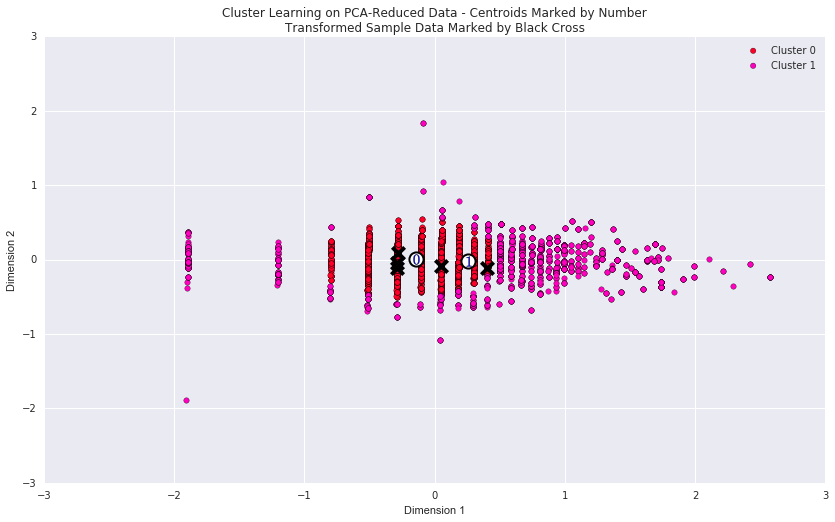

In [6]:
# I used the cluster silohouette score to determine the number of cluster.
# I tried sevelar cluster numbers and the best score result was 2 clusters
from sklearn import metrics
import visuals as vs
score = metrics.silhouette_score(reduced_data, preds, metric='euclidean')
print "Best Silhouette Score: {}".format(score)

# Visualize the cluster.
vs.cluster_results(reduced_data, preds, centers, pca_samples)

# Let us recover the centers to see how they compare to the sample data.
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)
# Display the true centers
patients = ['Patient {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = temp_data_ii.keys())
true_centers.index = patients
display(true_centers)

# Display the samples
# full_sample_data = pd.DataFrame(temp_data.loc[indices],columns = temp_data.keys()).reset_index(drop = True)
display(pd.DataFrame(good_data.loc[indices], columns = good_data.keys()))
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
# Display members of the cluster
print "Number of element cluster 0: {} Number of Elements Cluster 1: {}".format(len(reduced_data) - np.sum(preds), np.sum(preds))



### Conclusion of applying the clustering II
All the selected samples belong to cluster zero.
I got the number of cluster members. 
I can see that is unbalanced. 
Cluster "0" contains more data points that cluster "1". The variance that dominates the data set is the hospital staying days.
Because the medical condition (discrete data) is not taking in consideration in this exercise, it is possible that there some medical conditions that account for this classification. 
I could count the numbers of medical conditions on each cluster to see which medical conditions are more frequent on each cluster, but that wouldn't change the split. I will select an even number of each cluster to balance the dataset.


## Balancing the  Dataset

In this section, I will balance the dataset by getting even samples of each type of clusters and features.

I will perform the following steps:

- Create a new dataset with the following characteristics:
    - Even number of cluster datapoints
    - Even number of males and females
    - Even number of medical conditions

- Create the training data set.

'Unbalanced Dataset'

Number of F 974
Number of M 1662
Number of cardiovascular_disorders 1380
Number of diabetes 182
Number of hypertension 473
Number of lipid_disorders 381
Number of neoplasia 220
Number of cluster_membership 1318


'Training balanced dataset'

Number of F 441
Number of M 469
Number of cardiovascular_disorders 182
Number of diabetes 182
Number of hypertension 182
Number of lipid_disorders 182
Number of neoplasia 182
Number of cluster_membership 495

Distribution of patient ages and BMI
[[<matplotlib.axes._subplots.AxesSubplot object at 0x121967d10>


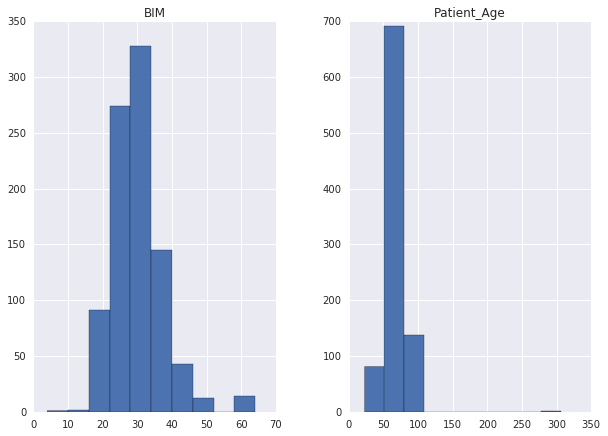

In [7]:
# Convert the prediction to a Series to join it the the good_data dataframe later.
cluster_membership = pd.Series(preds,name = 'cluster_membership')
temp_data_iii = pd.concat([good_data,cluster_membership], axis = 1)
    
# I will  create two even cluster datasets
cluster_0 = temp_data_iii.groupby(['cluster_membership']).get_group(0).sample(n = 1318, replace = True, random_state=200)
cluster_1 = temp_data_iii.groupby(['cluster_membership']).get_group(1).sample(n = 1318, replace = True, random_state=200)

# Join the clusters to get an even sample
clusters_dataset = cluster_0.append(cluster_1,ignore_index=True)

## Let us calulate the remaining number of categories.
display("Unbalanced Dataset")
cols_list = ['F','M','cardiovascular_disorders','diabetes','hypertension','lipid_disorders',
             'neoplasia','cluster_membership']
for cols in cols_list:
    print "Number of {} {}".format(cols,len(clusters_dataset.groupby([cols]).get_group(1)))
    
## Dataset is unbalanced, diabetes and neoplasia classes are low and the cardiovasculat is too big.
## I will sample an even number of all the categories
genders = []
genders.append((clusters_dataset.groupby(['M']).get_group(1)).sample(n = 1116, replace = True, random_state=200 ))
genders.append((clusters_dataset.groupby(['F']).get_group(1)).sample(n = 1116, replace = True, random_state=200 ))

# Now I append the re-sample categories to balance the data set from the genders point of view
genders_dataset = genders[0].append(genders[1], ignore_index=True) 

## Now let use select at least 120 samples of each category
categories = []
categories.append((genders_dataset.groupby(['cardiovascular_disorders']).get_group(1)).sample(n = 182,
                                                                                         replace = True,
                                                                                         random_state=200 ))
categories.append((genders_dataset.groupby(['hypertension']).get_group(1)).sample(n = 182,
                                                                                         replace = True,
                                                                                         random_state=200 ))
categories.append((genders_dataset.groupby(['lipid_disorders']).get_group(1)).sample(n = 182,
                                                                                         replace = True,
                                                                                         random_state=200 ))
categories.append((genders_dataset.groupby(['diabetes']).get_group(1)).sample(n = 182,
                                                                                         replace = True,
                                                                                         random_state=200 ))
categories.append((genders_dataset.groupby(['neoplasia']).get_group(1)).sample(n = 182,
                                                                                         replace = True,
                                                                                         random_state=200 ))


# Finall training dataset
training_dataset = categories[0]
categories.pop(0)
training_dataset = training_dataset.append(categories, ignore_index = True)


cols_list = ['F','M','cardiovascular_disorders','diabetes','hypertension','lipid_disorders'
             ,'neoplasia','cluster_membership']
display("Training balanced dataset")
for cols in cols_list:
    print "Number of {} {}".format(cols,len(training_dataset.groupby([cols]).get_group(1)))
    

# We will put the label in a separate series and the features in other
training_dataset = training_dataset.sample(frac=1).reset_index(drop=True)
training_labels = training_dataset['Hospital_Stay_Days']
training_features = training_dataset.drop(['Hospital_Stay_Days','cluster_membership'],axis = 1)

# Let visualize the distribution of ages and BMI
print ""
print "Distribution of patient ages and BMI"
print (training_features.hist(training_features.columns[0:2],figsize = (10,7)))


## Algorithms and Techniques

The type of algorithm I selected for this project are of three type, instance-based learning algorithms, regression algorithms, decision tree algorithms and clustering algorithms.
To predict a continue's label, it is necessary to select a continues prediction algorithm I choose three of these type:

- Linear Regression (chosen for its simplicity)
- Decision Tree Regression (chosen after explorer the data and understand its correlation)
- Nearest Neighborly (chosen to benchmark the LR and DT)

1.  A Linear Regressor based model is the simplest regression algorithm available; its sole parameter is the 
Normalization parameter. The normalization parameter is not useful as we will proof in the learning curve because we normalized the data way before passing it to the regressor.

2. Decision Tree Regressor (DTR), we noticed early in the project that the features will be a mix of continue and categorical data, linear regressors performance when some of the features are discrete is not acceptable, a perfect replacement is the DTR. DTR's models are capable of managing numerical and categorical data at the same time. The sklearn Decision Tree Regressor uses the CART algorithm, which is based on the C4.5 algorithm that in turns is an improvement of the ID3 algorithm. The differents between the ID3 and the C4.5 algorithm is that the C4.5 is capable of use numerical features, it does that by creating a discrete range of numerical features, example patients between 30 and 50 is a range, and a value between then will test true for that range. Finally, the differences between the C4.5 and the CART is that CART does the ranges also for the target which in our case is the days in the hospital (a numeric value). Is because of the previous explanation that this algorithm was selected.
For the DT model, the parameter selected for tuning was the tree max_depth. Another possible setting could be minimum samples per leaf, but because of the numerical nature of the target and the fact that it will become a discrete value this parameter when set beyond to 1 the model performs poorly ( it can't be that many ranges).

3. Nearest Neighborly, this is an instance base learner because it works by using the existing data a not by calculating its relation like the previous two algorithms.  It is also suitable for a mix of numerical and categorical features and target. It works by querying the existing training data using the features of the target that need to predict; then it measure the distance between the closest features, and finally, it averages the target of those features to calculate the prediction. We selected this algorithm to use it as a benchmark of the DTR and LN. The metric selected was the number of neighbors. Because of the small variance of the data we expect the algorithm to perform better than the other selected algorithms.


## Determine model learning curve
Now that the dataset is well balanced, I will proceed to determine the model learning curve. As I stay at the beginning of this exercise, I intended to use a linear regressor, after the initial data exploration I don't expect that this linear regressor performs well. The reason is that the data variance is too low producing a high bias in the model. I will try other two type of regressors decisionTrees and nearestNeigborh to see if I can get better results.

I will perform the following steps:

- I will create two training test split. One with the balanced data and what with all the data points.
- I will create a linearRegressor and plot its learning curve.
- I will present the analysis of the training curve.

Training and testing split was successful.
Length of the balanced features training split 773, length of the unbalanced features training split 4527


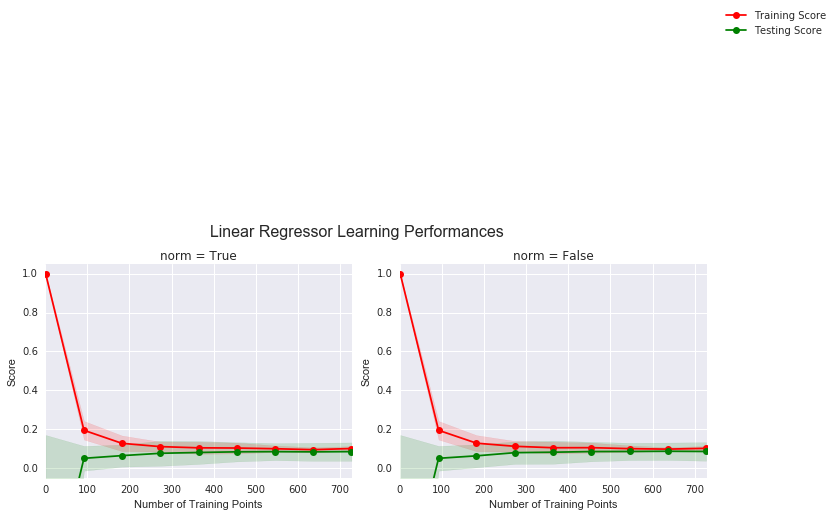

In [8]:
import visuals as vs
import pandas as pd
from sklearn import cross_validation
import sklearn.learning_curve as curves
from sklearn import linear_model

from sklearn.cross_validation import ShuffleSplit, train_test_split

# Created two sets balanced and unbalanced
X_train_b, X_test_b, y_train_b, y_test_b = cross_validation.train_test_split(training_features,training_labels,test_size=0.15,random_state=10)
X_train_u, X_test_u, y_train_u, y_test_u = cross_validation.train_test_split(good_data.drop(['Hospital_Stay_Days'],axis = 1),good_data['Hospital_Stay_Days'],test_size=0.15,random_state=10)
print "Training and testing split was successful."
print "Length of the balanced features training split {}, length of the unbalanced features training split {}".format(len(X_train_b),len(X_train_u))


# Pretty display for notebooks
%matplotlib inline

# Produce learning curves for varying training sets using a Linear regressor

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on normalization
    for k, norm in enumerate([True,False]):
        
        # Create a linear regressor at normaliztion = norm
        regressor = linear_model.LinearRegression(normalize = norm)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('norm = %s'%(norm))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Linear Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
    

ModelLearning(training_features, training_labels)

### Analysis of the learning curve

The linear regressor performed very poorly. No matter the type of hyperparameter (normalization) the model after 300 samples stops learning. To fix this BIAS problem, I need to add new features. Also, the used of the normalization parameter as I stated before is not useful because the data is normalized already.

## Benchmark Model

We will use a supervise learning method to predict the time a patient spend in the hospital. Because our vector label continues we will use a regression predictor, and we will compare its prediction with an information based learner (K-nearest neighbor), this will allows to benchmark one model versus the other. We will use cross-validation to make sure with dont overfit the model and the R2 Coefficient of Determination to measure the accuracy of our model or what is the same how well it explains the label based on the features. Our learner contains some bias introduced during the features selection; this is because we are selecting the medical conditions used in previous obesity paradox studies, selecting only patients that survive a surgery and finally only taking in consideration the first visit to a hospital. The added bias is based on the observable features related to the paradox, and the sampling process. Introducing new features will be only a guess that can create model complexity due to the additional dimensions.

## Construction of the Nearest Neighbor and decisionTreeRegressor

The poor performance of the previous regressor is due to the BIAS.
I will build two more models, and I will test them using both the balanced and the unbalanced splits.

I will perform the following steps:
- Build a decisionTree and a NearestNeighborg regressor.
- Use grid searches to look for both models best hyperparameters.
- Conclusions

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# Nearest Neighborg using balanced data
neigh_b = KNeighborsRegressor(n_neighbors = 2, leaf_size = 30, p = 2)
neigh_b.fit(X_train_b,y_train_b)
y_predict_NN_b = neigh_b.predict(X_test_b)
print "NN Score using balanced data: {}".format(performance_metric(y_test_b,y_predict_NN_b))

# Nearest Neighborg using unbalanced data
neigh_u = KNeighborsRegressor(n_neighbors = 2, leaf_size = 30, p = 2)
neigh_u.fit(X_train_u,y_train_u)
y_predict_NN_u = neigh_u.predict(X_test_u)
print "NN Score using ubalanced data: {}".format(performance_metric(y_test_u,y_predict_NN_u))

print ""

# Decision Tree using balanced data
tree_b = DecisionTreeRegressor(random_state=0, max_depth = 14 )
tree_b.fit(X_train_b, y_train_b )
y_predict_tree_b = tree_b.predict(X_test_b)
print "DT Score using balanced data: {}".format(performance_metric(y_test_b,y_predict_tree_b))

# Decision Tree using unbalanced data
tree_u = DecisionTreeRegressor(random_state=0, max_depth = 14, min_samples_split = 2)
tree_u.fit(X_train_u, y_train_u )
y_predict_tree_u = tree_u.predict(X_test_u)
print "DT Score using ubalanced data: {}".format(performance_metric(y_test_u,y_predict_tree_u))

NN Score using balanced data: 0.234907650606
NN Score using ubalanced data: 0.524965821676

DT Score using balanced data: 0.0140990266578
DT Score using ubalanced data: 0.422960446681


In [47]:
# Import 'make_scorer', 'DecisionTreeRegressor', 'KNeighborsRegressor' and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn import grid_search
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsRegressor

# Improving Decission Tree
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = cross_validation.ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.10, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = tree.DecisionTreeClassifier()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,15)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

reg_tree_b = fit_model(X_train_b,np.array(y_train_b, dtype='int16'))
# Produce grid parameters
print "Decision Tree parameters: {} ".format(reg_tree_b.get_params())

print ""

# Improving nearestNeighborgh
#
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = cross_validation.ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.10, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = KNeighborsRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'n_neighbors':range(2,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

reg_nn_b = fit_model(X_train_b,np.array(y_train_b, dtype='int16'))
# Produce the grid parameters
print "NN parameters: {} ".format(reg_nn_b.get_params())




Decision Tree parameters: {'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'max_features': None, 'max_depth': 12, 'class_weight': None} 

NN parameters: {'n_neighbors': 2, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'uniform', 'leaf_size': 30} 


### Conclusion
After training the two additional regressors with datasets balanced and unbalanced, we determined that the best regressors are the NN and DT with no balanced data.

Is clear that the BIAS is affecting the models, but the only way to deal with it is finding other features that can be added to the dataset. Adding other features will invalidate the experiment so we will create a final ensemble model with the best regressors to see if we can improve the accuracy of the model. 
Another potential solution is finding patient samples with a more spread variance, but we only have access to one dataset, and we are using all the patients in it.

## Ensemble model of the best regressors
 
In this section, I will create an ensemble model using the NN and DT models that score higher than 0.40 of accuracy.
An ensemble model is just a group of models working in series where the first model make a prediction and those targets where it did not predict correctly are passed to the next model and so on as many time as estimators were selected; this type of ensemble used a method called Boosting. They are more suitable for a group of weak learners than the other method called bagging.

In the previous sections of this project I used three different models, only two of them got accuracies bigger than 40%, and only one passed the 50% of precision; this by itself justifies the use of an Ensemble. The sklearn ensemble model we used in based on the Adaboost algorithm, its steps are:

- Fit a sequence of weak learners repeatedly modified versions of the data. 
- The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

I will perform the following steps

- Create a boost ensemble model using the best regressors from the previous section.
- Conclusions

In [51]:
from sklearn.ensemble import AdaBoostRegressor

# Create ensemble of decision trees
tree_b_ensemble = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=30, random_state=0)
tree_b_ensemble.fit(X_train_b, y_train_b )
y_predict_tree_b_ensemble = tree_b_ensemble.predict(X_test_b)

print "DT Ensemble Score using 30 estimators balanced data: {}".format(
    performance_metric(y_test_b,y_predict_tree_b_ensemble))

print ""

# Create ensemble of Nearest Neighborg
nn_u_ensemble = AdaBoostRegressor(KNeighborsRegressor(n_neighbors = 4),
                          n_estimators=100, random_state=0)
nn_u_ensemble.fit(X_train_u, y_train_u)
y_predict_nn_u_ensemble = nn_u_ensemble.predict(X_test_u)

print "NN Ensemble Score using 100 estimators unbalanced data: {}".format(
    performance_metric(y_test_u,y_predict_nn_u_ensemble))



DT Ensemble Score using 30 estimators balanced data: 0.257476797806

NN Ensemble Score using 100 estimators unbalanced data: 0.57569355522


## Results

Even after using a boosted ensemble which helps with the BIAS still the best model NN produces only a 0.57 score of accuracy.
I believe the model is robust enough, but still can benefit from adding some extract features to help boost the precision.
In a later exercise at the end of the project,  I tested the model with three fake patients and plotted the result over imposing to the Patients Day standard distribution curve.  The predicted values are within the norm deviations what proof the model is predicting a value that belongs to the data distribution.
The final model is reasonable but not aligned with what I was expecting. When I started to balance the data, I used a clustering algorithm to determine if BMI variance explained the hospitalization days, but the result was negative. The purpose of my project was to proof the hypothesis of the BMI be responsible for the patient recovery speed, and the conclusions is that is not on its own.  

## Using the prediction model.
In the next section I will used my best model to predict the stay of three patients.




| Features | Patient 1 | Patient 2 | Patiente 3 |
| :---: | :---: | :---: | :---: |
| Patient_Age | 25 | 50 | 80 |
| BIM | 20 | 45 | 35 |
| Gender | M | M | F |
| Medical Condition | diabities | cardiovascular disorders | high collesterol |


I will perform the following steps
- Using the best model predict the above patients hospital stay

Predicted days in Hospital patient 1 5.75
Predicted days in Hospital patient 2 3.75
Predicted days in Hospital patient 3 8.0


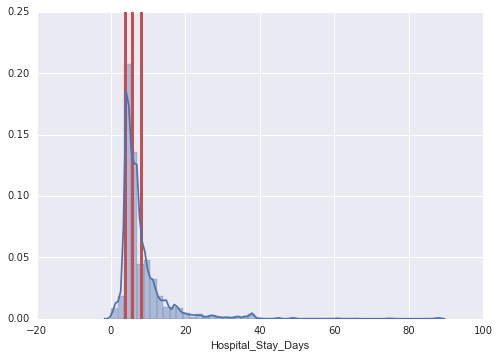

In [62]:
# Produce a matrix for patient data
# Patient_Age,BIM,F,M,cardiovascular_disorders,diabetes,hypertension,lipid_disorders,neoplasia

patient_data = [[25, 20, 0, 1, 0, 1, 0, 0, 0], # Patient 1
               [50, 45, 0, 1, 1, 0, 0, 0, 0], # Patient 2
               [80, 35, 1, 0, 0, 0, 0, 1, 0]]  # Client 3

# Show predictions
for i, days in enumerate(nn_u_ensemble.predict(patient_data)):
    print "Predicted days in Hospital patient {} {}".format(i+1, days)

# Plot the patients stayind data histogram and over impose the prediction
import matplotlib.pyplot as plt
#plt.hist(good_data['Hospital_Stay_Days'], bins = 30)
for days in nn_u_ensemble.predict(patient_data):
    plt.axvline(days, c = 'r', lw = 3)

import seaborn as sns
sns.set(color_codes=True)
sns.distplot(good_data['Hospital_Stay_Days'])


## Free-Form Visualization


I used several forms of visualization during the project.
At the beginnings of this study, I plotted the data correlation; it helps me to understand in advanced how well the linear regressor will perform.
When I used the clustering model to get information to balance the data. I plotted the cluster using the first two principal components to label the clusters based on the samples I took. The plot helps me to understand that the hospitalization value explains better the data than the BMI or the Age.
I plotted the heatmap of the selected samples to help me compared the selected samples with each other and with the dataset.
I plotted the distribution of the continues features to understand the relation with each other.
I Final use an over imposed plotted to see if my prediction were within the normal distributions of the dataset target.


## Improvements


I am not happy with 0.57 of precision. It is evident to me that the dataset requires another feature that helps to explain better the hospitalization time. One thing I would do different is work in tandem with a physician to help me understand base on his/her experience what that missing feature might be. Another thing I will be different is to select the days in "intensive care" instead of the hospitalization days of the patient first visits. It is strange that when I plotted the variance of the features versus the hospitalization time the patients within 0 and maybe 15 days where all group by age or BMI. After 15 days in the hospital, it seems like the age and BMI start to spread as more time the patient spent in the hospital; this could be because I selected the specific medical conditions instead of picking all type of medical conditions. Another hypothesis is that because the records come from the same hospital, such hospital has standard time for the first visit based on the patient condition. A way to overcome these problems is to collect data from different hospitals and get all medical conditions.
Also, most of the patients in my sample were overweight or obese; very few were within the normal weight range. So more variance in the samples is also required.


## Capstone Project Conclusions

The initial goal of the project was to create a model capable of predicting how long a patient will stay in a hospital, based on the features describe in the Obesity Paradox studies.
The main features are the BMI, Age, Gender and four specific medical conditions.
The exploration of the data resulted in the following findings:
1. The correlation between the BMI and Age with the hospital time was little and did not explain the hospitalization time too well. 
2. The staying in the hospital accounted for most of the variances in the whole dataset.
3. Data was unbalanced, having more patients with shorter stays than longer ones.
The experiment indicates that the BMI, Age and medical conditions explain the staying in the hospital to a certain degree, but the lack of other features creates BIAS in the model, which doesn't allow it to get a better accuracy.
Using other features will invalid the initial goal, so we didn't add any.
The experiment can benefit from more medical domain knowledge, by adding the missing features that will improve the model accuracy.

It was exciting and challenging to me work with numerical and categorical features at the same time the target is numerical. Linear regression doesn't like discrete values, so it forces me to use others models capable of predicting numerical values using a mix of numerical and categorical features, this was quite a challenge.  
